In [173]:
###############################################################################
# Date:        Sept. 12th 2019
# Name:      Peiying Lyu 
#ID:              8109407016
# Course:    INF 552, HW1
#
#
#a. pre-processing and exploratory data anglysis
################################################################################

import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn

dataFile = pd.read_csv("D:/552 Machine Learning for Data Science/homework/Homework1/HW1/column_2C.dat",
                                               sep = ' ', header = None)
dataFile.columns = ['pelvic incidence','pelvic tilt','lumbar lordosis angle', 
                                        'sacral slope','pelvic radius','grade of spondylolisthesis', 
                                        'class']

class_labels = {'AB':1, 'NO':0,}

#for f.
low_error_list = []


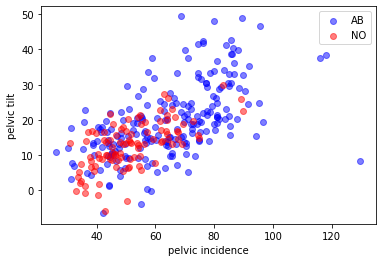

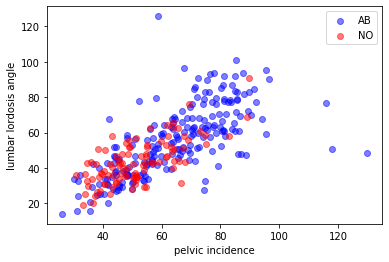

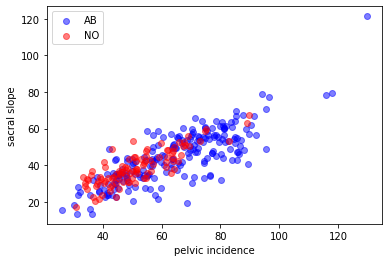

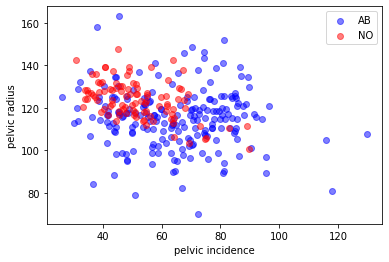

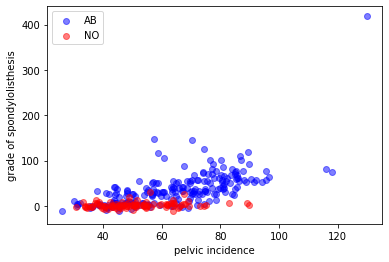

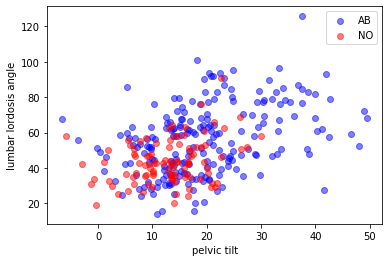

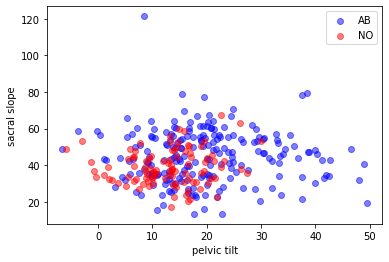

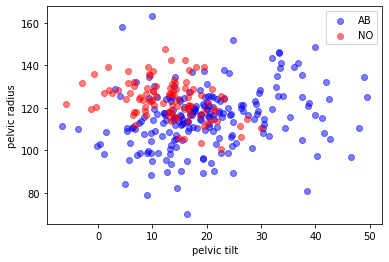

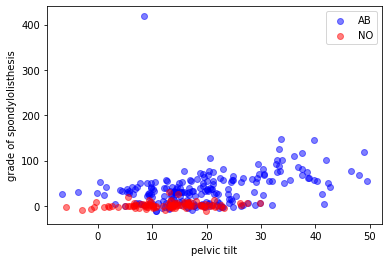

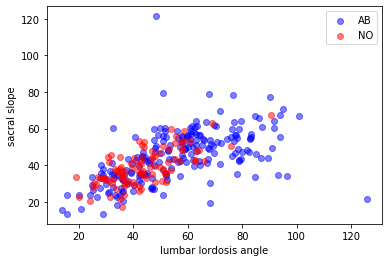

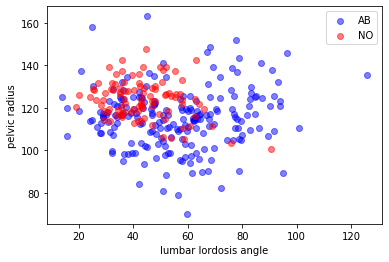

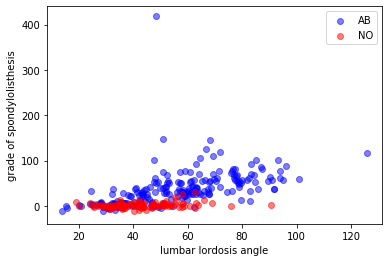

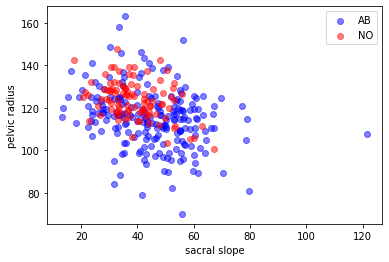

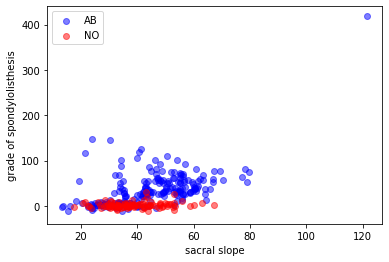

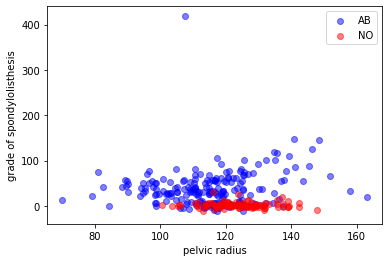

In [174]:
################################################################################
# b.i. scatterplots
################################################################################

df_len_cols = dataFile.shape[1] #columns [0]rows

for i in range(df_len_cols -2): # maximun = 7, so avilable max = 5
    for j in range(i+1, df_len_cols -1): 
        dataFrame_x = dataFile.columns[i]
        dataFrame_y = dataFile.columns[j]
        
        AB1 = dataFile.loc[dataFile['class'] == 'AB', dataFrame_x]
        AB2 = dataFile.loc[dataFile['class'] == 'AB', dataFrame_y]
        NO1 = dataFile.loc[dataFile['class'] == 'NO',dataFrame_x]
        NO2 = dataFile.loc[dataFile['class'] == 'NO', dataFrame_y]
        
        fig = plt.figure()
        axes=fig.add_subplot(1,1,1)

        f1 = axes.scatter(AB1, AB2, marker='o',c='blue',alpha=0.5)
        f2 = axes.scatter(NO1, NO2, marker='o',c='red',alpha=0.5)
        plt.xlabel(dataFrame_x)
        plt.ylabel(dataFrame_y)
        axes.legend((f1, f2), ('AB','NO'))
        ##output
        plt.show()


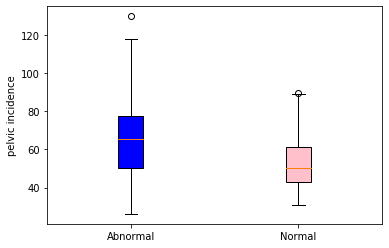

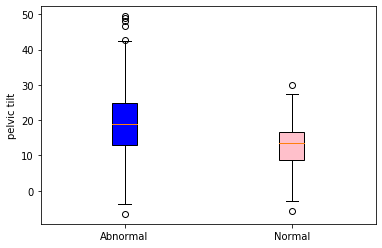

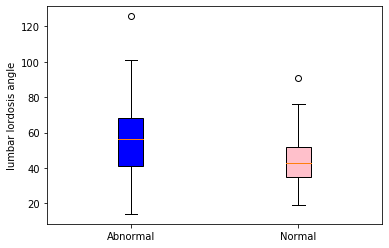

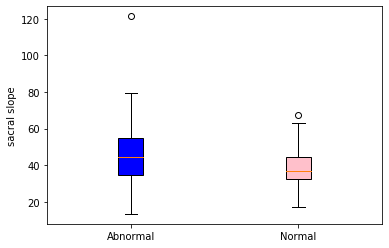

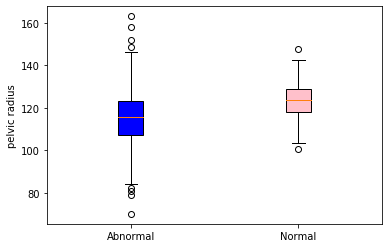

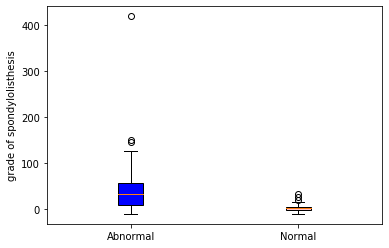

In [175]:
################################################################################
# b.ii. boxplots
################################################################################

colors = ['blue','pink']
labels = ['Abnormal','Normal']
df_len_cols = dataFile.shape[1]

for b in dataFile.columns[: df_len_cols -1]:
    bplot_data = [ dataFile.loc[dataFile['class'] == 'AB', b], 
                dataFile.loc[dataFile['class'] == 'NO', b]
                ]
    bplot = plt.boxplot(bplot_data, patch_artist=True,labels=labels)
    plt.ylabel(b)

    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    plt.show()
    

In [176]:
#################################################################################
# b.iii.selecting and training data
# c.i python with knn by using sklearn
################################################################################

dataFile = pd.read_csv("D:/552 Machine Learning for Data Science/homework/Homework1/HW1/column_2C.dat",sep = ' ', header = None)
dataFile.columns = ['pelvic incidence','pelvic tilt','lumbar lordosis angle', 'sacral slope','pelvic radius','grade of spondylolisthesis', 'class']
#class_labels = {'AB':1, 'NO':0, 'DH': None, 'SL': None }
dataSet = np.array(dataFile)

print(dataSet)
#Preprocessing into attributes and labers
ab_dataset = dataSet[np.where(dataSet[:,6] == 'AB')]
no_dataset = dataSet[np.where(dataSet[:,6] == 'NO')]

#Train Test Split
#x_train
ab_train_dataset = ab_dataset[:140,:]  
no_train_dataset = no_dataset[:70,:]   

#x_test
ab_test_dataset = ab_dataset[140:, :]  
no_test_dataset = no_dataset[70:, :]    


#combine ab&no_train&test_dataset
train_dataset = np.vstack((ab_train_dataset,no_train_dataset))
test_dataset = np.vstack((no_test_dataset, ab_test_dataset))

#transfer
#te_y
y_test = np.array([1 if i == 'AB' else 0 for i in test_dataset[:,-1]])
x_test = test_dataset[:, :-1]


y_train = np.array([1 if i == 'AB' else 0 for i in train_dataset[:,-1]])
x_train = train_dataset[:, :-1]

#Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)


[[63.03 22.55 39.61 ... 98.67 -0.25 'AB']
 [39.06 10.06 25.02 ... 114.41 4.56 'AB']
 [68.83 22.22 50.09 ... 105.99 -3.53 'AB']
 ...
 [61.45 22.69 46.17 ... 125.67 -2.71 'NO']
 [45.25 8.69 41.58 ... 118.55 0.21 'NO']
 [33.84 5.07 36.64 ... 123.95 -0.2 'NO']]


[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.28, 0.27, 0.24, 0.23, 0.2, 0.22, 0.15, 0.2, 0.16, 0.16, 0.14, 0.18, 0.14, 0.16, 0.15, 0.16, 0.17, 0.16, 0.14, 0.13, 0.12, 0.13, 0.12, 0.13, 0.12, 0.12, 0.12, 0.12, 0.11, 0.11, 0.12, 0.12, 0.1, 0.11, 0.11, 0.11, 0.1, 0.11, 0.1, 0.11, 0.09, 0.12, 0.1, 0.12, 0.06, 0.13]
   
#The optimal number of neighbors is [208, 205, 202, 199, 196, 193, 190, 187, 184, 181, 178, 175, 172, 169, 166, 163, 160, 157, 154, 151, 148, 145, 142, 139, 136, 133, 130, 127, 124, 121, 118, 115, 112, 109, 106, 103, 100, 97, 94, 91, 88, 85, 82, 79, 76, 73, 70, 67, 64, 61, 58, 55, 52, 49, 46, 43, 40, 37, 34, 31, 28, 25, 22, 19, 16, 13, 10, 7, 4]   
   
#The minimun error:     0.06
 #The best K:    4
[[20 10]
 [ 3 67]]
              precision    recall  f1-score   support

           0       0.87      0.67      0.75        30
           1       0.87      0.96      0.91        70

    accuracy       

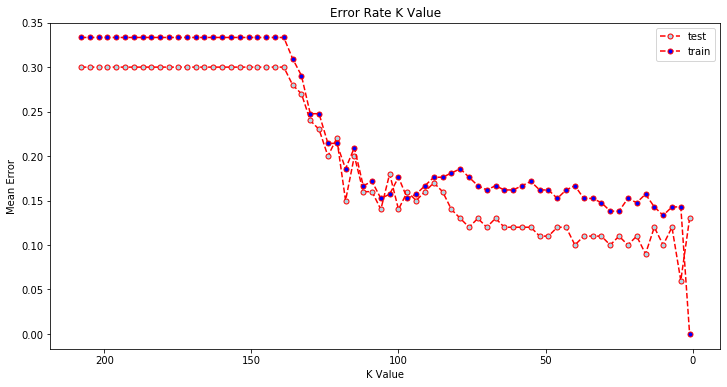

In [187]:
########################################################################
#c.ii Calulating error for K value between 208 and 1
#######################################################################
from scipy import stats
error = []
error_train = []

#testing
for i in range(208,-1, -3):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
#training
for j in range(208,-1, -3):
    knn_train = KNeighborsClassifier(n_neighbors=j)
    knn_train.fit(x_train, y_train)
    pred_j = knn_train.predict(x_train)
    error_train.append(np.mean(pred_j != y_train))    
    

plt.figure(figsize=(12, 6))
plt.plot(range(208, -1, -3), error, color='red', linestyle='dashed', marker='o', markerfacecolor='lightblue', markersize=5, label='test' )
plt.plot(range(208, -1, -3), error_train, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=5, label='train')
#axes.legend((f1, f2), ('AB','NO'))
plt.gca().invert_xaxis()
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.legend(loc='upper right')
print(error)

mse = [1-x for x in error]
optimal_k = [list(range(208,1,-3))][mse.index(min(mse))]

########################################################################
#
#c.iii Best_K in K={208, 1, -3}, 
#
########################################################################

print('   ')
print("#The optimal number of neighbors is {}   ".format(optimal_k))
print('   ')
print("#The minimun error:    ", min(error))
k_range = np.arange(208,1,-3)
print(" #The best K:   ", k_range[error.index(min(error))])

#evalaute model
from statistics import mean
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix( y_test, pred_i))
print(classification_report(y_test, pred_i))
tmp=[]
for i in range(len(pred_i)):
    tmp.append(0 if y_test[i] == pred_i[i] else 1)
print(mean(tmp))

#for f
low_error_list.append(min(error))


[0.25, 0.19999999999999996, 0.21999999999999997, 0.25, 0.30000000000000004, 0.29000000000000004, 0.29000000000000004, 0.29000000000000004, 0.29000000000000004, 0.25, 0.21999999999999997, 0.17000000000000004, 0.16000000000000003, 0.15000000000000002, 0.13, 0.13, 0.13, 0.09999999999999998, 0.08999999999999997, 0.08999999999999997, 0.07999999999999996]
0.07999999999999996
   


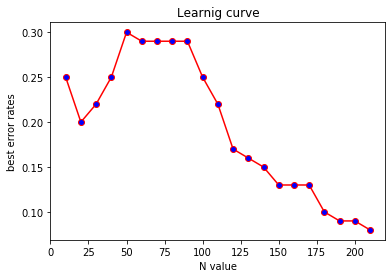

In [178]:
###################################################################
#c.iii  Plot the best test error rate & learning curve
#       The different training set will bring different dataset
###################################################################

#N = [i*10  for i in range(1,22)]
N=[i for i in range(10,211,10)]
K = [i for i in range(1,201,5)]
best_error_rates = {n: [] for n in N}
k_min_error_list =[]

for n in N:
    k_min_error =[]
    #select data
    n_ab_tr = ab_dataset[:n-int(n//3),:]
    n_no_tr = no_dataset[:int(n//3),:]

    n_ab_te = ab_dataset[n-int(n//3):, :]
    n_no_te = no_dataset[int(n//3):, :]

    #using old  testing data
    n_train_dataset = np.vstack((n_ab_tr, n_no_tr))  #x_tr
    #reminding testing data
    #n_test_dataset = np.vstack((n_ab_te, n_no_te))  #x_te

    n_y_te = np.array([1 if i == 'AB' else 0 for i in test_dataset[:,-1]])
    n_x_te = test_dataset[:, :-1]

    n_y_tr = np.array([1 if i== 'AB' else 0 for i in n_train_dataset[:,-1]])
    n_x_tr = n_train_dataset[:,:-1]
    
    # mean square error
    K = [i for i in range(1, n, 5)]
    
    k_error =[]
    
    k_mse = {k:0 for k in K}
    #K_mse = [1-x for x in k_error]
  
    for k in K:
        #Training and Predictions
        c=0 #error_rate
        k_knn = KNeighborsClassifier(n_neighbors=k)
        k_knn.fit(n_x_tr,n_y_tr)
        #pred_k = k_knn.predict(n_x_te) #
        c=1-(k_knn.score(n_x_te,n_y_te))
        k_error = k_error+[c]
        
    k_min_error = min(k_error)
    k_min_error_list =  k_min_error_list+[k_min_error ]
    
print(k_min_error_list)
print(min(k_min_error_list))


#plot_y = [ best_error_rates[i][0]  for  i  in  best_error_rates ]
print('   ')
plt.figure()
plt.plot(N,k_min_error_list, color='red', marker='o',markerfacecolor='blue',label='error')
plt.title('Learnig curve')
plt.xlabel('N value')
plt.ylabel('best error rates')

plt.show()

#for f
low_error_list.append(min(k_min_error_list))


d.i A

In [179]:
#############################################################
#
#d.i  Replace  Euclidean metric into  Minkowski Distance:
#
#############################################################
K = [i for i in range(1, 197, 5)]
error = []
#original 
#x_train, y_train, x_test, y_test

#A. Manhattan distance: p=1
for k in K:
    c=0
    knn = KNeighborsClassifier(n_neighbors=k, p=1)
    knn.fit(x_train, y_train)
    c=1-(knn.score(x_test, y_test))
    error = error+[c]
    
print(error)

min_error_list = []

k_range = np.arange(1,197,5)
print('    ')
print("#The best error:   ", min(error))
min_error = min(error)
 
length = len(error)
best_k = []
for i in range(1,length,1):
    if error[i] == min_error:
            #min_error_list = min_error_list[c]
            min_error_list.append(error[i])
            best_k.append( k_range[i])
            
#print(min_error_list)
print("#The optimal k:   ", best_k)
print("#The Best K:   ",max(best_k))

low_error_list.append(min(error))

[0.12, 0.10999999999999999, 0.10999999999999999, 0.12, 0.12, 0.10999999999999999, 0.12, 0.13, 0.13, 0.13, 0.14, 0.13, 0.15000000000000002, 0.15000000000000002, 0.14, 0.14, 0.16000000000000003, 0.15000000000000002, 0.19999999999999996, 0.19999999999999996, 0.21999999999999997, 0.20999999999999996, 0.22999999999999998, 0.20999999999999996, 0.21999999999999997, 0.24, 0.28, 0.28, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004]
    
#The best error:    0.10999999999999999
#The optimal k:    [6, 11, 26]
#The Best K:    26


In [180]:
#############################################################
#d.i replace  Euclidean metric into  Minkowski Distance:
#############################################################

K = [i for i in range(1, 197, 5)]
P = [j/10 for j in range(1,11,1)]
error = []
import math
#original 
#x_train, y_train, x_test, y_test

#B change P values in minkowski
for p in P:
        p_value = math.pow(10,p)
        c=0
        knn = KNeighborsClassifier(n_neighbors=26, p=p_value, metric='minkowski')
        knn.fit(x_train, y_train)
        c=1-(knn.score(x_test, y_test))
        error = error+[c]

print('P,  error')
for i in range(len(P)):
    print(P[i],         error[i])
    

P_range = np.arange(0.1,1.0,0.1)
print('      ')
print("#The best log10(V)p:   ", P_range[error.index(min(error))])
print("#The best error:   ", min(error))

#print(error)
#k_range = np.arange(1,197,5)
#print("#The best K:", k_range[error.index(min(error))])

low_error_list.append(min(error))


P,  error
0.1 0.09999999999999998
0.2 0.09999999999999998
0.3 0.10999999999999999
0.4 0.09999999999999998
0.5 0.10999999999999999
0.6 0.09999999999999998
0.7 0.10999999999999999
0.8 0.10999999999999999
0.9 0.10999999999999999
1.0 0.10999999999999999
      
#The best log10(V)p:    0.1
#The best error:    0.09999999999999998


In [181]:
#############################################################
#d.i replace  Euclidean metric into  Minkowski Distance:
#############################################################

K = [i for i in range(1, 197, 5)]
P = [i for i in range(1,)]
error =[]

#c. chebyshev distance
for k in K:
    for pp in P:
        c=0
        knn = KNeighborsClassifier(n_neighbors=k, p=pp, metric='chebyshev')
        knn.fit(x_train, y_train)
        c=1-(knn.score(x_test, y_test))
        error = error+[c]
        
print(error)
k_range = np.arange(1,197,5)
print("            ")
print("#The best K:   ", k_range[error.index(min(error))])
print("#The best error   :", min(error))

#for f
low_error_list.append(min(error))

[0.13, 0.08999999999999997, 0.12, 0.07999999999999996, 0.10999999999999999, 0.12, 0.12, 0.09999999999999998, 0.13, 0.12, 0.12, 0.12, 0.14, 0.13, 0.14, 0.10999999999999999, 0.14, 0.12, 0.15000000000000002, 0.14, 0.18999999999999995, 0.18000000000000005, 0.18000000000000005, 0.18000000000000005, 0.20999999999999996, 0.20999999999999996, 0.25, 0.28, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004]
            
#The best K:    16
#The best error   : 0.07999999999999996


In [182]:
#############################################################
#d.ii Mahalanobis Distance.
#############################################################

K = [i for i in range(1, 197, 5)]
error =[]
v = np.linalg.inv(np.cov(x_train.astype("float")))

for k in K:
    c=0
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'uniform',metric='mahalanobis',metric_params={'V': v}, algorithm = 'brute')
    knn.fit(x_train, y_train)
    c=1-(knn.score(x_test, y_test))
    error = error+[c]

print(error)
k_range = np.arange(1,197,5)
print('               ')
print("#The best K:   ", k_range[error.index(min(error))])
print("#The best error:   ", min(error))

low_error_list.append(min(error))


[0.18000000000000005, 0.16000000000000003, 0.18999999999999995, 0.19999999999999996, 0.22999999999999998, 0.20999999999999996, 0.20999999999999996, 0.22999999999999998, 0.22999999999999998, 0.24, 0.25, 0.26, 0.26, 0.26, 0.27, 0.27, 0.25, 0.27, 0.28, 0.26, 0.28, 0.29000000000000004, 0.29000000000000004, 0.29000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004]
               
#The best K:    6
#The best error:    0.16000000000000003


# <center> summarized data in table </center>
| Distance method | Matrics | Best test error rate |
| :-----------------: |:-------:|: --------------------|
| Minkowski Distance| log10(V)p: 0.1| 0.09999999999999998
| Chebyshev Distance| k = 16 | 0.07999999999999996
| Mahanttan Distance| k =6| 0.16000000000000003

In [183]:
####################################################################
#e.  the different of weights would bring the different affects to the results
####################################################################

K = [i for i in range(1, 197, 5)]
error_E =[]
v = np.linalg.inv(np.cov(x_train.astype("float")))

#Euclidean
for k in K:
    c=0
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance')
    knn.fit(x_train, y_train)
    c=1-(knn.score(x_test, y_test))
    error_E = error_E+[c]
    
low_error_list.append(min(error_E))
    
k_range = np.arange(1,197,5)
print("#The best K in Euclidean:", k_range[error_E.index(min(error_E))])
print("#The best error:", min(error_E))    
print('   ')
#Manhattan
error =[]
for k in K:
    c=0
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance',metric='manhattan')
    knn.fit(x_train, y_train)
    c=1-(knn.score(x_test, y_test))
    error = error+[c]

k_range = np.arange(1,197,5)
print("#The best K in Manhattan:", k_range[error.index(min(error))])
print("#The best error:", min(error)) 
print('   ')
low_error_list.append(min(error))

#Chebyshev    
error=[]
for k in K:
    c=0
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance',metric='chebyshev')
    knn.fit(x_train, y_train)
    c=1-(knn.score(x_test, y_test))
    error = error+[c]
    
k_range = np.arange(1,197,5)
print("#The best K in Chebyshev:", k_range[error.index(min(error))])
print("#The best error:", min(error))

low_error_list.append(min(error))

#The best K in Euclidean: 6
#The best error: 0.09999999999999998
   
#The best K in Manhattan: 26
#The best error: 0.09999999999999998
   
#The best K in Chebyshev: 16
#The best error: 0.10999999999999999


# <center> summarized data in table </center>
| Distance method | weights | Best test error rate |
| :-----------------: |:-------:|: --------------------|
| Euclidean distance| k = 6| 0.09999999999999998 
| Mahanttan Distance| k =26| 0.09999999999999998
|Chebbyshec Distance| k=16| 0.10999999999999999

In [184]:
########################################################
#f. The lowest training error rate you achieved in this homework?
#######################################################

print('#The lowest training error rate I achieved in this homework:   ',min(low_error_list))


#The lowest training error rate I achieved in this homework:    0.06
